# 붓꽃(Iris) 데이터 분류 

## 1. 라이브러리 설정하기

In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense, Softmax
#from tensorflow.keras import optimizers

In [2]:
%matplotlib inline

## 2. 데이터 가져오기 

In [2]:
import pandas as pd

df = pd.read_csv('./Iris.csv', encoding='UTF8')
df.shape

(150, 6)

In [7]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


** 라벨을 위해 Species의 텍스트는 범주형 혹은 숫자로 인코딩 해야한다

## 3. 데이터 가시화 

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

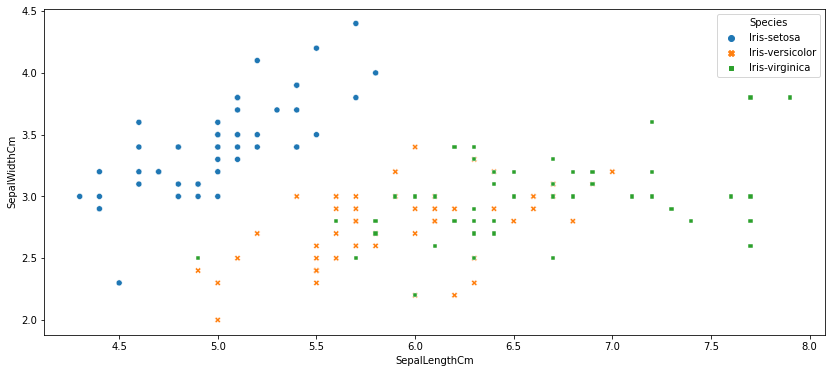

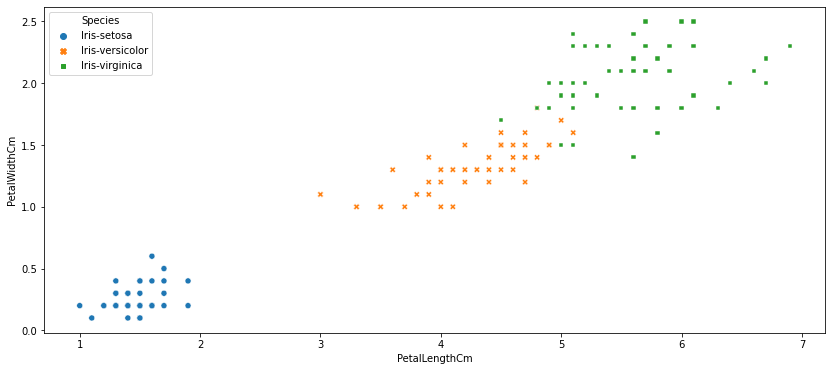

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x = 'SepalLengthCm', 
    y = 'SepalWidthCm', hue='Species', style='Species')
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x = 'PetalLengthCm', 
    y = 'PetalWidthCm', hue='Species', style='Species')

In [9]:
df.drop('Id',axis=1,inplace=True)

## 4 머신러닝을 위한 입력 데이터 만들자

### 1) 입력 X와 출력 y의 값을 정하기

In [10]:
df['Species'].unique()

df['Species'] = df['Species'].str[5:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_col = 'Species'
X = df[feature_cols]
y = df[target_col]

### 출력용 라벨을 머신러닝용을 다루자

- 타켓의 텍스트를 숫자로 바꾸자 

In [12]:
class_dic = {'setosa':0, 'versicolor':1, 'virginica':2}
y_ohc = y.apply(lambda z: class_dic[z])

# 머신러닝 모델을 만들자

- 데이터의 범위를 [0,1] 사이로 스케일 
- 사이킷런의 MinMaxScaler()

### 데이터를 훈련과 테스트로 나누자 
- (실전) 데이터를 validation을 포함해서 나눌수 있다.
- (해보기) 전체 데이터를 train : validation : test = 0.6: 0.2: 0.2 로 나누어라

In [13]:
import sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ohc, test_size=0.2,random_state=20)

X_train.shape

(120, 4)

In [15]:
model = keras.Sequential([
    keras.layers.Dense(3, activation = 'softmax', input_shape=[4])])

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 64, verbose=2)            

Epoch 1/300
2/2 - 0s - loss: 1.1422 - accuracy: 0.3250
Epoch 2/300
2/2 - 0s - loss: 1.1404 - accuracy: 0.3250
Epoch 3/300
2/2 - 0s - loss: 1.1385 - accuracy: 0.3250
Epoch 4/300
2/2 - 0s - loss: 1.1365 - accuracy: 0.3250
Epoch 5/300
2/2 - 0s - loss: 1.1346 - accuracy: 0.3250
Epoch 6/300
2/2 - 0s - loss: 1.1329 - accuracy: 0.3250
Epoch 7/300
2/2 - 0s - loss: 1.1310 - accuracy: 0.3250
Epoch 8/300
2/2 - 0s - loss: 1.1291 - accuracy: 0.3250
Epoch 9/300
2/2 - 0s - loss: 1.1273 - accuracy: 0.3250
Epoch 10/300
2/2 - 0s - loss: 1.1254 - accuracy: 0.3250
Epoch 11/300
2/2 - 0s - loss: 1.1236 - accuracy: 0.3250
Epoch 12/300
2/2 - 0s - loss: 1.1218 - accuracy: 0.3250
Epoch 13/300
2/2 - 0s - loss: 1.1200 - accuracy: 0.3250
Epoch 14/300
2/2 - 0s - loss: 1.1181 - accuracy: 0.3250
Epoch 15/300
2/2 - 0s - loss: 1.1165 - accuracy: 0.3250
Epoch 16/300
2/2 - 0s - loss: 1.1146 - accuracy: 0.3250
Epoch 17/300
2/2 - 0s - loss: 1.1129 - accuracy: 0.3250
Epoch 18/300
2/2 - 0s - loss: 1.1111 - accuracy: 0.3250
E

Epoch 147/300
2/2 - 0s - loss: 0.9336 - accuracy: 0.6667
Epoch 148/300
2/2 - 0s - loss: 0.9325 - accuracy: 0.6667
Epoch 149/300
2/2 - 0s - loss: 0.9314 - accuracy: 0.6750
Epoch 150/300
2/2 - 0s - loss: 0.9302 - accuracy: 0.6750
Epoch 151/300
2/2 - 0s - loss: 0.9291 - accuracy: 0.6750
Epoch 152/300
2/2 - 0s - loss: 0.9280 - accuracy: 0.6750
Epoch 153/300
2/2 - 0s - loss: 0.9269 - accuracy: 0.6750
Epoch 154/300
2/2 - 0s - loss: 0.9258 - accuracy: 0.6750
Epoch 155/300
2/2 - 0s - loss: 0.9247 - accuracy: 0.6667
Epoch 156/300
2/2 - 0s - loss: 0.9236 - accuracy: 0.6667
Epoch 157/300
2/2 - 0s - loss: 0.9224 - accuracy: 0.6667
Epoch 158/300
2/2 - 0s - loss: 0.9213 - accuracy: 0.6667
Epoch 159/300
2/2 - 0s - loss: 0.9203 - accuracy: 0.6667
Epoch 160/300
2/2 - 0s - loss: 0.9192 - accuracy: 0.6750
Epoch 161/300
2/2 - 0s - loss: 0.9181 - accuracy: 0.6750
Epoch 162/300
2/2 - 0s - loss: 0.9170 - accuracy: 0.6750
Epoch 163/300
2/2 - 0s - loss: 0.9159 - accuracy: 0.6750
Epoch 164/300
2/2 - 0s - loss: 

Epoch 291/300
2/2 - 0s - loss: 0.7972 - accuracy: 0.7083
Epoch 292/300
2/2 - 0s - loss: 0.7964 - accuracy: 0.7083
Epoch 293/300
2/2 - 0s - loss: 0.7956 - accuracy: 0.7083
Epoch 294/300
2/2 - 0s - loss: 0.7948 - accuracy: 0.7083
Epoch 295/300
2/2 - 0s - loss: 0.7940 - accuracy: 0.7083
Epoch 296/300
2/2 - 0s - loss: 0.7932 - accuracy: 0.7083
Epoch 297/300
2/2 - 0s - loss: 0.7924 - accuracy: 0.7083
Epoch 298/300
2/2 - 0s - loss: 0.7916 - accuracy: 0.7083
Epoch 299/300
2/2 - 0s - loss: 0.7909 - accuracy: 0.7083
Epoch 300/300
2/2 - 0s - loss: 0.7901 - accuracy: 0.7083


In [17]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 86ms/step - loss: 0.8209 - accuracy: 0.7333


[0.8209304809570312, 0.7333333492279053]

In [18]:
import numpy as np
acc_dnn = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the Deep Learning is:', acc_dnn)

The accuracy of the Deep Learning is: 0.7083333134651184


In [20]:

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'r', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'b', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

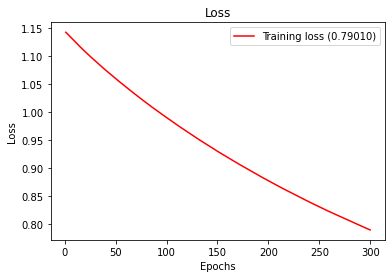

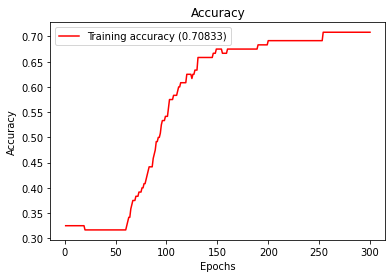

In [21]:
plot_history(history)